<a href="https://colab.research.google.com/github/EzeRamirez84/Trabajo-Practico-Final-Intro-a-Machine-Learning/blob/main/Trabajo_Final_EzequielRamirez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATOS:
*   Ezequiel Ramirez
*   DNI: 40915978





### Consigna
1. Quiero que implementen ***al menos 3*** modelos, ya sea cambiando: hiperparametros, o algo de los datos.
2. Comparen el rendimiento de los modelos utilizando las metricas de evaluacion vistas en clases (al menos dos), justifiquen por que eligieron esas metricas de evaluacion.
3. El entregable final es una jupyter notebook (puede ser un link a colab) donde se ve implementado:
    - Los tres modelos con su codigo correspondiente.
    - El codigo para evaluar los modelos.
    - La comparacion de los modelos utilizando las metricas de evaluacion vistas en clases. Pueden utilizar los bloques de markdown (como este que estan leyendo) para realizar esta comparacion `teorica`.
4. Quiero y espero que empiecen su propio colab, desde cero. Pueden copiar y pegar los proximos dos bloques de codigo para arrancar, pero eso es todo. Buena suerte y hasta luego!

In [ ]:
import pandas as pd

url = 'https://drive.google.com/uc?id=1xEoQV1yaTWp_NQEg9br-IfMY6K7UdUIY'
datos_dolar = pd.read_csv(url, index_col=0)

datos_dolar.head()
datos_dolar.shape



(4961, 23)

### Separacion entre

In [ ]:
url_y_testeo = 'https://drive.google.com/uc?id=1x5h1kxbCEku4MV05ST9btUSSrK6Gcl3M'

first_test = int(len(datos_dolar)*0.9)
#print(first_test)
testeo_definitivo = datos_dolar.iloc[first_test:]
#datos de testeo final
X_test = testeo_definitivo.drop(columns=['y'])
y_test = testeo_definitivo[['y']]
X = datos_dolar.iloc[:first_test]

y = X[['y']]
X = X.drop(columns=['y'])


first_val = int(len(X)*0.8)
#datos de entrenamiento
X_train = X.iloc[:first_val]

y_train = y.iloc[:first_val]
#datos de validacion
X_val = X.iloc[first_val:]
y_val = y.iloc[first_val:]

##Set de datos nuevos
Quiero agarrar otros datos de testeo para asegurarme que el modelo funciona bien

In [ ]:
dolar_df = pd.read_csv('https://drive.google.com/uc?id=18unbrdZ1Hk9AJQjFhs-1XVKFgBGs2_Eo&export=download', delimiter= ";")

In [ ]:
dolar_df['promedio'] = dolar_df.mean(axis=1)

dolar_promedio = dolar_df[['promedio']]

dolar_promedio['suavizado'] = dolar_promedio['promedio'].rolling(window=5, center=True).mean()
dolar_suavizado = dolar_promedio[["suavizado"]][dolar_promedio['suavizado'].isna() != True][dolar_promedio['suavizado'] != 0]

dolar_promedio['mas_suavizado'] = dolar_promedio['promedio'].rolling(window=50, center=True).mean()
dolar_mas_suavizado = dolar_promedio[["mas_suavizado"]][dolar_promedio['mas_suavizado'].isna() != True][dolar_promedio['mas_suavizado'] != 0]

<ipython-input-4-12fecf75f68a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dolar_df['promedio'] = dolar_df.mean(axis=1)
<ipython-input-4-12fecf75f68a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dolar_promedio['suavizado'] = dolar_promedio['promedio'].rolling(window=5, center=True).mean()
<ipython-input-4-12fecf75f68a>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dolar_suavizado = dolar_promedio[["suavizado"]][dolar_promedio['suavizado'].isna() != True][dolar_promedio['suavizado'] != 0]
<ipython-input-4-12fecf75f68a>:8: SettingWithCop

Intento sacar la misma estructura pero con nuevos valores

##Datos con ventana de 5

In [ ]:
nuevos_datos = []
for i in range(len(dolar_suavizado)-24):
  lista_dias = []
  for j in range(0,23):
    lista_dias.append(dolar_suavizado.iloc[i+j,0])
  nuevos_datos.append(lista_dias)



In [ ]:
import numpy as np
nuevos_datos_v = np.array(nuevos_datos)
nuevos_datos_df = pd.DataFrame(nuevos_datos_v, columns = [ "Dia " + str(i+1) for i in range(0,23)])

In [ ]:
test_nuevos_datos = nuevos_datos_df.iloc[int(len(nuevos_datos)*0.9):,:]

In [ ]:
y_test_2 = pd.DataFrame(np.array(test_nuevos_datos.iloc[:,22]),columns=['y'])
X_test_2 = test_nuevos_datos.drop(columns=['Dia 23'])
#X_test_2 = X_test_2.iloc[int(len(nuevos_datos)*0.2):,:]
y_test_2

,y
0,96.034000
1,96.131333
2,96.184667
3,96.239333
4,96.287333
...,...
493,213.803333
494,214.464667
495,215.040000
496,215.965333


##datos con ventana de 50

In [ ]:
nuevos_datos2 = []
for i in range(len(dolar_mas_suavizado)-24):
  lista_dias = []
  for j in range(0,23):
    lista_dias.append(dolar_mas_suavizado.iloc[i+j,0])
  nuevos_datos2.append(lista_dias)


In [ ]:
nuevos_datos_df2 = pd.DataFrame(np.array(nuevos_datos2), columns = [ "Dia " + str(i+1) for i in range(0,23)])

In [ ]:
test_nuevos_datos2 = nuevos_datos_df2.iloc[int(len(nuevos_datos2)*0.9):,:]
test_nuevos_datos2_array = np.array(test_nuevos_datos2.iloc[:,22])
y_test_2_mas = pd.DataFrame(test_nuevos_datos2_array,columns=['y'])
X_test_2_mas = test_nuevos_datos2.drop(columns=['Dia 23'])


#Comparacion entre los 2 sets de testeo

##Primer set de datos creado

In [ ]:
X_test_2.head()

,Dia 1,Dia 2,Dia 3,Dia 4,Dia 5,Dia 6,Dia 7,Dia 8,Dia 9,Dia 10,...,Dia 13,Dia 14,Dia 15,Dia 16,Dia 17,Dia 18,Dia 19,Dia 20,Dia 21,Dia 22
4475,93.489333,93.597333,93.696667,93.774000,93.878667,93.991333,94.126667,94.255333,94.402667,94.514667,...,94.886000,95.004667,95.138667,95.274000,95.402667,95.496000,95.577333,95.702000,95.800000,95.916667
4476,93.597333,93.696667,93.774000,93.878667,93.991333,94.126667,94.255333,94.402667,94.514667,94.641333,...,95.004667,95.138667,95.274000,95.402667,95.496000,95.577333,95.702000,95.800000,95.916667,96.034000
4477,93.696667,93.774000,93.878667,93.991333,94.126667,94.255333,94.402667,94.514667,94.641333,94.758000,...,95.138667,95.274000,95.402667,95.496000,95.577333,95.702000,95.800000,95.916667,96.034000,96.131333
4478,93.774000,93.878667,93.991333,94.126667,94.255333,94.402667,94.514667,94.641333,94.758000,94.886000,...,95.274000,95.402667,95.496000,95.577333,95.702000,95.800000,95.916667,96.034000,96.131333,96.184667
4479,93.878667,93.991333,94.126667,94.255333,94.402667,94.514667,94.641333,94.758000,94.886000,95.004667,...,95.402667,95.496000,95.577333,95.702000,95.800000,95.916667,96.034000,96.131333,96.184667,96.239333


##Segundo set de datos creado

In [ ]:
X_test_2_mas.loc[4475:(4475+4),:]

,Dia 1,Dia 2,Dia 3,Dia 4,Dia 5,Dia 6,Dia 7,Dia 8,Dia 9,Dia 10,...,Dia 13,Dia 14,Dia 15,Dia 16,Dia 17,Dia 18,Dia 19,Dia 20,Dia 21,Dia 22
4475,95.716800,95.803800,95.886733,95.964933,96.045333,96.125400,96.206000,96.283533,96.358533,96.434600,...,96.660600,96.730733,96.802867,96.872467,96.941133,97.007133,97.069867,97.131133,97.189933,97.248267
4476,95.803800,95.886733,95.964933,96.045333,96.125400,96.206000,96.283533,96.358533,96.434600,96.511733,...,96.730733,96.802867,96.872467,96.941133,97.007133,97.069867,97.131133,97.189933,97.248267,97.309667
4477,95.886733,95.964933,96.045333,96.125400,96.206000,96.283533,96.358533,96.434600,96.511733,96.586800,...,96.802867,96.872467,96.941133,97.007133,97.069867,97.131133,97.189933,97.248267,97.309667,97.369867
4478,95.964933,96.045333,96.125400,96.206000,96.283533,96.358533,96.434600,96.511733,96.586800,96.660600,...,96.872467,96.941133,97.007133,97.069867,97.131133,97.189933,97.248267,97.309667,97.369867,97.423800
4479,96.045333,96.125400,96.206000,96.283533,96.358533,96.434600,96.511733,96.586800,96.660600,96.730733,...,96.941133,97.007133,97.069867,97.131133,97.189933,97.248267,97.309667,97.369867,97.423800,97.478467


#Modelo red neuronal

##Busqueda de mejores hiperparametros para una Red Neuronal

Intente hacer busqueda de mejores numeros de neuronas pero no estoy seguro de si me da correctamente

In [ ]:
#!pip install scikeras[tensorflow]

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.constraints import max_norm

# Function to create model, required for KerasClassifier
def create_model(input_neurons, ocultas):
    # create model
    model = Sequential()

    # Capa de entrada
    model.add(Dense(units=input_neurons, activation='relu', input_dim=22))

    # Agregar capas ocultas
    model.add(Dense(units=ocultas, activation='relu'))

    # Agregar capa de salida
    model.add(Dense(units=1))  # Capa de salida

    # Compilar el modelo
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse', 'mape'])
    return model

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# Define the grid search parameters
input_neurons = [10, 11, 13, 15, 20]
ocultas = [4, 6, 8]

# Create the KerasClassifier model
modelBH = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=2)

# Define the parameter grid
param_grid = dict(input_neurons=input_neurons, ocultas=ocultas)

# Create and fit the grid search
grid = GridSearchCV(estimator=modelBH, param_grid=param_grid, n_jobs=-1, cv=5, scoring = 'neg_mean_squared_error')
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


<ipython-input-43-2d41faa33a28>:37: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelBH = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=2)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/100
112/112 - 4s - loss: 5.5789 - mae: 1.0773 - mse: 5.5789 - mape: 18.6000 - 4s/epoch - 34ms/step
Epoch 2/100
112/112 - 0s - loss: 0.0447 - mae: 0.1088 - mse: 0.0447 - mape: 2.1443 - 324ms/epoch - 3ms/step
Epoch 3/100
112/112 - 1s - loss: 0.0437 - mae: 0.1059 - mse: 0.0437 - mape: 2.0474 - 512ms/epoch - 5ms/step
Epoch 4/100
112/112 - 0s - loss: 0.0427 - mae: 0.1028 - mse: 0.0427 - mape: 1.9396 - 365ms/epoch - 3ms/step
Epoch 5/100
112/112 - 0s - loss: 0.0417 - mae: 0.0951 - mse: 0.0417 - mape: 1.7249 - 334ms/epoch - 3ms/step
Epoch 6/100
112/112 - 0s - loss: 0.0407 - mae: 0.0911 - mse: 0.0407 - mape: 1.5837 - 356ms/epoch - 3ms/step
Epoch 7/100
112/112 - 0s - loss: 0.0400 - mae: 0.0868 - mse: 0.0400 - mape: 1.4673 - 352ms/epoch - 3ms/step
Epoch 8/100
112/112 - 0s - loss: 0.0392 - mae: 0.0797 - mse: 0.0392 - mape: 1.2686 - 334ms/epoch - 3ms/step
Epoch 9/100
112/112 - 0s - loss: 0.0389 - mae: 0.0803 - mse: 0.0389 - mape: 1.2581 - 319ms/epoch - 3ms/step
Epoch 10/100
112/112 - 0s - l

Mejor numero de neuronas:

Primer resultado:
*   Cantidad de neuronas de entrada: 10
*   Cantidad de neuronas en la capa oculta: 4

Segundo resultado:
*   Cantidad de neuronas de entrada: 15
*   Cantidad de neuronas en la capa oculta: 6

Tarda mucho tiempo en buscar los mejores hiperparametros por lo que no hice muchas pruebas



In [ ]:
grid_result.best_params_

{'input_neurons': 15, 'ocultas': 6}

Para visualizar los datos de la busqueda de hiperparametros en excel

In [ ]:
resultadosRN = pd.DataFrame(grid_result.cv_results_)
resultadosRN.sort_values("rank_test_score")
#resultadosRN.to_csv("cv_resultadosRN.csv")


##Red Neuronal 1


*   62 neuronas de entrada
*   16 en la capa oculta
Ambas con funcion de activacion relu



Definicion del modelo y compilacion

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
#agrego un L2
from keras.regularizers import l2
model = Sequential()

#Capa de entrada
model.add(Dense(units=62, activation='relu', input_dim=22))

#Agregar capas ocultas
#model.add(Dense(units=16, activation='relu',kernel_regularizer=l2(0.001)))  #Primera capa oculta
model.add(Dense(units=16, activation='relu'))  #Primera capa oculta

#Agregar capa de salida
model.add(Dense(units=1))  # Capa de salida

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mape'])


Detalles del modelo:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 62)                1426      
                                                                 
 dense_4 (Dense)             (None, 16)                1008      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,451
Trainable params: 2,451
Non-trainable params: 0
_________________________________________________________________


Entrenamiento del modelo

In [ ]:

#history = model.fit(X_train, y_train,epochs=10, batch_size=32, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
112/112 [==============================] - 2s 6ms/step - loss: 2.3264 - mae: 0.6314 - mape: 10.7617 - val_loss: 1.9469 - val_mae: 0.7643 - val_mape: 1.8915
Epoch 2/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0349 - mae: 0.0838 - mape: 1.4512 - val_loss: 2.4197 - val_mae: 0.9700 - val_mape: 2.1492
Epoch 3/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0337 - mae: 0.0787 - mape: 1.3071 - val_loss: 2.0327 - val_mae: 0.8266 - val_mape: 1.9440
Epoch 4/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0323 - mae: 0.0720 - mape: 1.1370 - val_loss: 2.4786 - val_mae: 0.9998 - val_mape: 2.1835
Epoch 5/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0315 - mae: 0.0677 - mape: 0.9993 - val_loss: 1.8703 - val_mae: 0.7679 - val_mape: 1.8427
Epoch 6/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0320 - mae: 0.0715 - mape: 1.0621 - val_loss: 1.7109 - val_mae: 0.6907 - val_mape: 1.73

Otro entrenamiento del mismo modelo para comparar resultados

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0123 - mae: 0.0581 - mape: 0.9734 - val_loss: 0.6500 - val_mae: 0.6061 - val_mape: 1.2894
Epoch 2/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0070 - mae: 0.0328 - mape: 0.5027 - val_loss: 0.4076 - val_mae: 0.2887 - val_mape: 0.7312
Epoch 3/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0082 - mae: 0.0419 - mape: 0.6892 - val_loss: 0.6920 - val_mae: 0.6369 - val_mape: 1.3470
Epoch 4/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0096 - mae: 0.0502 - mape: 0.8273 - val_loss: 0.5880 - val_mae: 0.4972 - val_mape: 1.0659
Epoch 5/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0082 - mae: 0.0431 - mape: 0.7071 - val_loss: 0.4227 - val_mae: 0.3169 - val_mape: 0.7614
Epoch 6/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0082 - mae: 0.0396 - mape: 0.6281 - val_loss: 0.4078 - val_mae: 0.3127 - val_mape: 0.776

In [ ]:
score = model.evaluate(X_test,y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.3658 - mae: 0.5812 - mape: 0.4825


Hice varias pruebas y parece tener resultados parecidos, con los valores de validacion cercanos a:
* Loss:0.5
* MAE:0.5
* MAPE:1

No estoy seguro de que depende eso.

###GRAFICOS DE RED NEURONAL 1

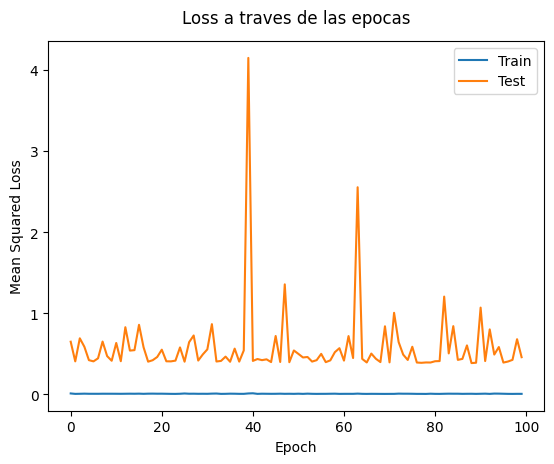

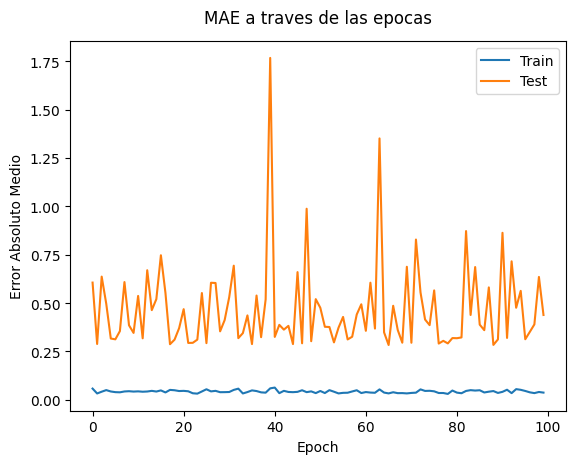

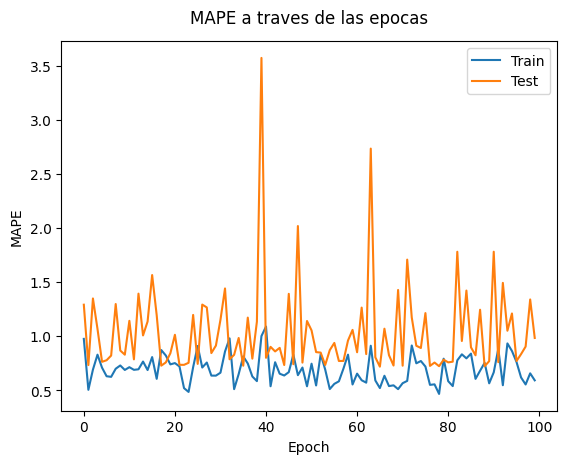

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.ylabel('Mean Squared Loss')
plt.xlabel('Epoch')
plt.title('Loss a traves de las epocas', pad=13)
plt.legend(loc='upper right')
plt.show()

plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Test')
plt.ylabel('Error Absoluto Medio')
plt.xlabel('Epoch')
plt.title('MAE a traves de las epocas', pad=13)
plt.legend(loc='upper right')
plt.show()

plt.plot(history.history['mape'], label='Train')
plt.plot(history.history['val_mape'], label='Test')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.title('MAPE a traves de las epocas', pad=13)
plt.legend(loc='upper right')
plt.show()

##Red Neuronal 2



*   15 neuronas de entrada
*   6 en la capa oculta
Ambas con funcion de activacion relu

Definicion del modelo y compilacion

In [ ]:
#Definicion
model2 = Sequential()

model2.add(Dense(15, activation='relu', input_dim=22))

model2.add(Dense(6, activation='relu'))

model2.add(Dense(units=1))

#Compilacion
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mape'])

Detalles del modelo:

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 15)                345       
                                                                 
 dense_7 (Dense)             (None, 6)                 96        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


Entrenamiento del modelo

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0115 - mae: 0.0392 - mape: 0.5974 - val_loss: 1.1363 - val_mae: 0.7492 - val_mape: 1.5776
Epoch 2/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0121 - mae: 0.0438 - mape: 0.6629 - val_loss: 0.6587 - val_mae: 0.3822 - val_mape: 0.9654
Epoch 3/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0129 - mae: 0.0494 - mape: 0.7828 - val_loss: 0.7830 - val_mae: 0.5148 - val_mape: 1.1393
Epoch 4/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0118 - mae: 0.0419 - mape: 0.6394 - val_loss: 0.7221 - val_mae: 0.5106 - val_mape: 1.1845
Epoch 5/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0122 - mae: 0.0434 - mape: 0.6678 - val_loss: 0.7940 - val_mae: 0.5263 - val_mape: 1.1589
Epoch 6/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0111 - mae: 0.0380 - mape: 0.5673 - val_loss: 0.6686 - val_mae: 0.3935 - val_mape: 0.960

In [ ]:
score2 = model2.evaluate(X_test,y_test)

16/16 [==============================] - 0s 3ms/step - loss: 0.1095 - mae: 0.2346 - mape: 0.1614


###Grafico a traves de las epocas

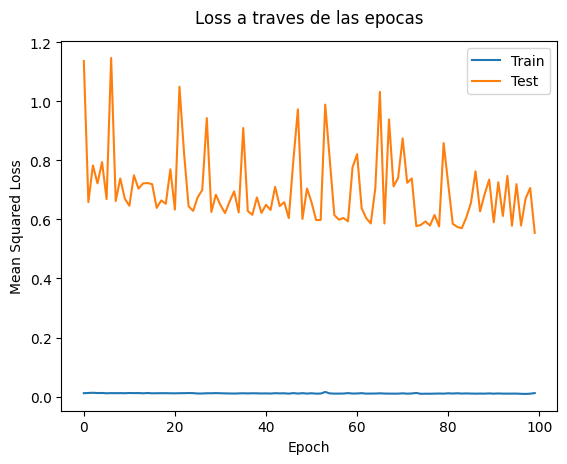

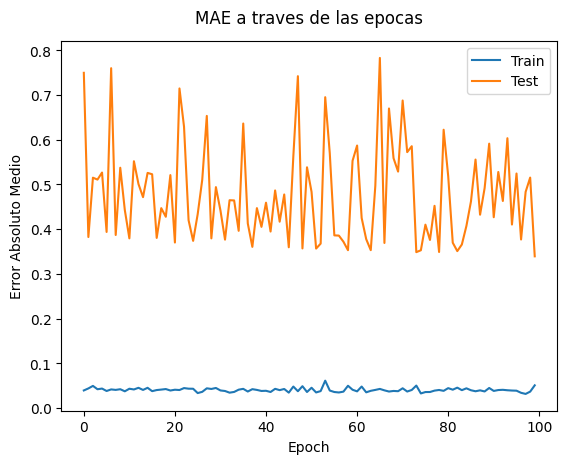

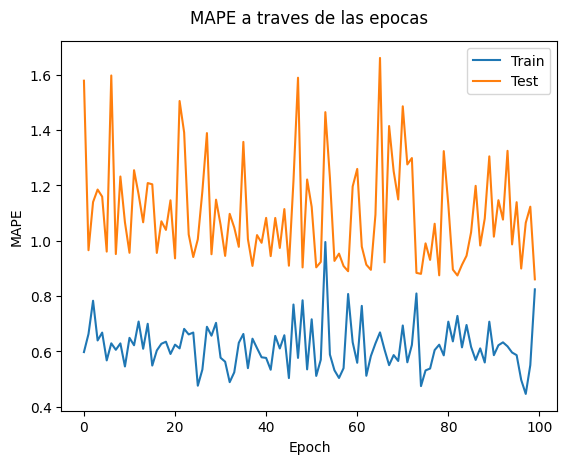

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(history2.history['loss'], label='Train')
plt.plot(history2.history['val_loss'], label='Test')
plt.ylabel('Mean Squared Loss')
plt.xlabel('Epoch')
plt.title('Loss a traves de las epocas', pad=13)
plt.legend(loc='upper right')
plt.show()

plt.plot(history2.history['mae'], label='Train')
plt.plot(history2.history['val_mae'], label='Test')
plt.ylabel('Error Absoluto Medio')
plt.xlabel('Epoch')
plt.title('MAE a traves de las epocas', pad=13)
plt.legend(loc='upper right')
plt.show()

plt.plot(history2.history['mape'], label='Train')
plt.plot(history2.history['val_mape'], label='Test')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.title('MAPE a traves de las epocas', pad=13)
plt.legend(loc='upper right')
plt.show()

##Prediccion con modelo 1 RN con 3 datos de testeo

In [ ]:

predictions = model.predict(X_test)


16/16 [==============================] - 0s 2ms/step


In [ ]:
predictions2 = model.predict(X_test_2)

16/16 [==============================] - 0s 2ms/step


In [ ]:
predictions3 = model.predict(X_test_2_mas)

16/16 [==============================] - 0s 2ms/step


##Prediccion con modelo 2 RN con 3 datos de testeo

In [ ]:

predictions_2 = model2.predict(X_test)


16/16 [==============================] - 0s 2ms/step


In [ ]:
predictions2_2 = model2.predict(X_test_2)

16/16 [==============================] - 0s 1ms/step


In [ ]:
predictions3_2 = model2.predict(X_test_2_mas)

16/16 [==============================] - 0s 3ms/step


##guardo primer modelo de red neuronal

In [ ]:
model.save("model.red_neuronal_62_16_1")

##guardo segundo modelo de red neuronal

In [ ]:
model.save("model2.red_neuronal_10_4_1")

In [ ]:
#x_new = np.random.rand(3, 22)
#X_train
print(X_test.shape[0],"\n")
print(y_test.columns.values)
#print(y_test.columns.first)


993 

['0']


#MODELO 1 RED NEURONAL

##Prediccion con RED NEURONAL TESTEO 1

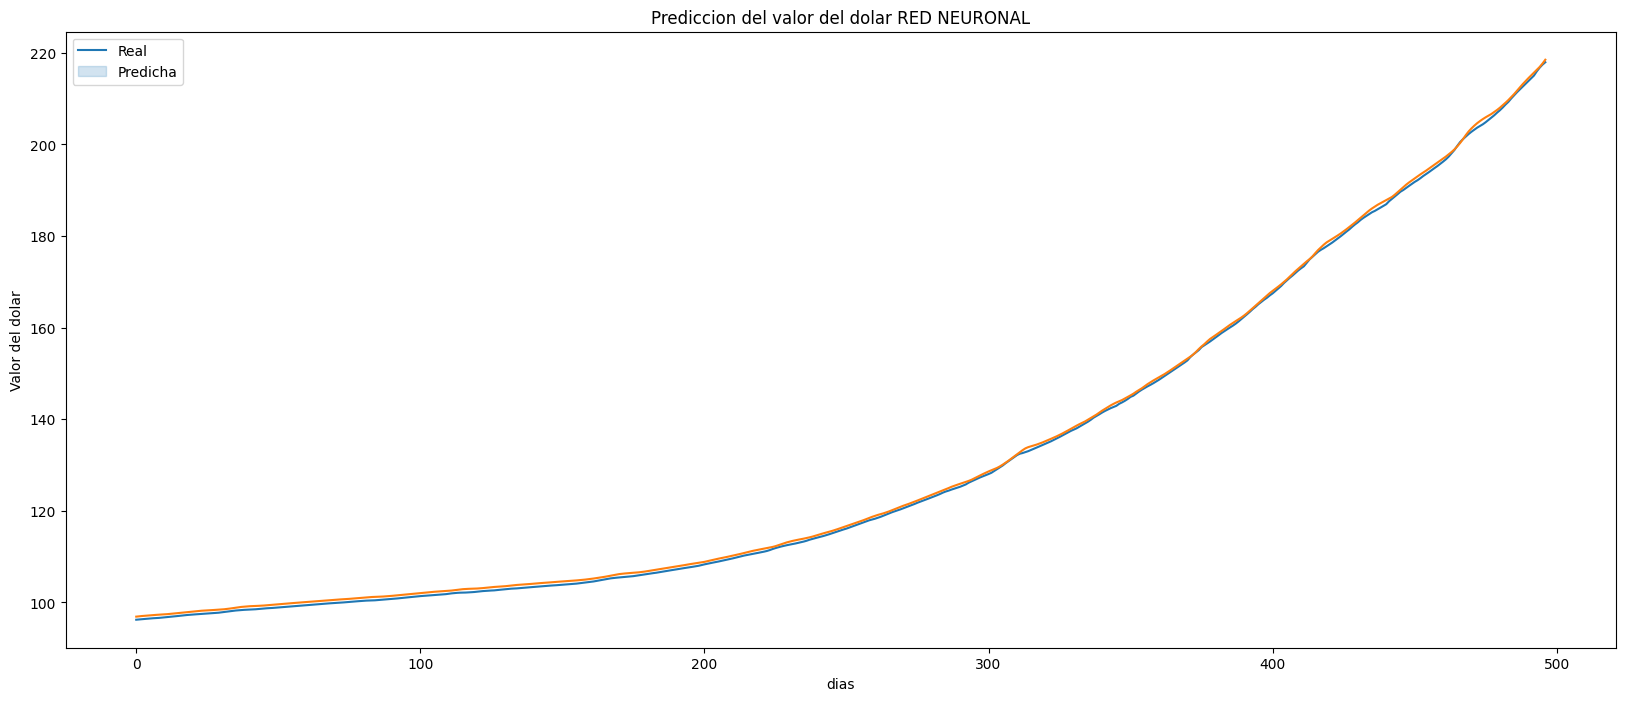

In [ ]:


plt.figure(figsize=(20,8))
sns.lineplot(x=[i for i in range(0,X_test.shape[0])], y=y_test.iloc[:,0])
sns.lineplot(x=[i for i in range(X_test.shape[0])],y=predictions[:,0])
#sns.lineplot(x=[i for i in range(len(dolar_mas_suavizado))], y = dolar_mas_suavizado['mas_suavizado'])

plt.title("Prediccion del valor del dolar RED NEURONAL")
plt.xlabel("dias")
plt.ylabel("Valor del dolar")
plt.legend(["Real","Predicha"])
plt.show()

##Prediccion con RED NEURONAL TESTEO 2

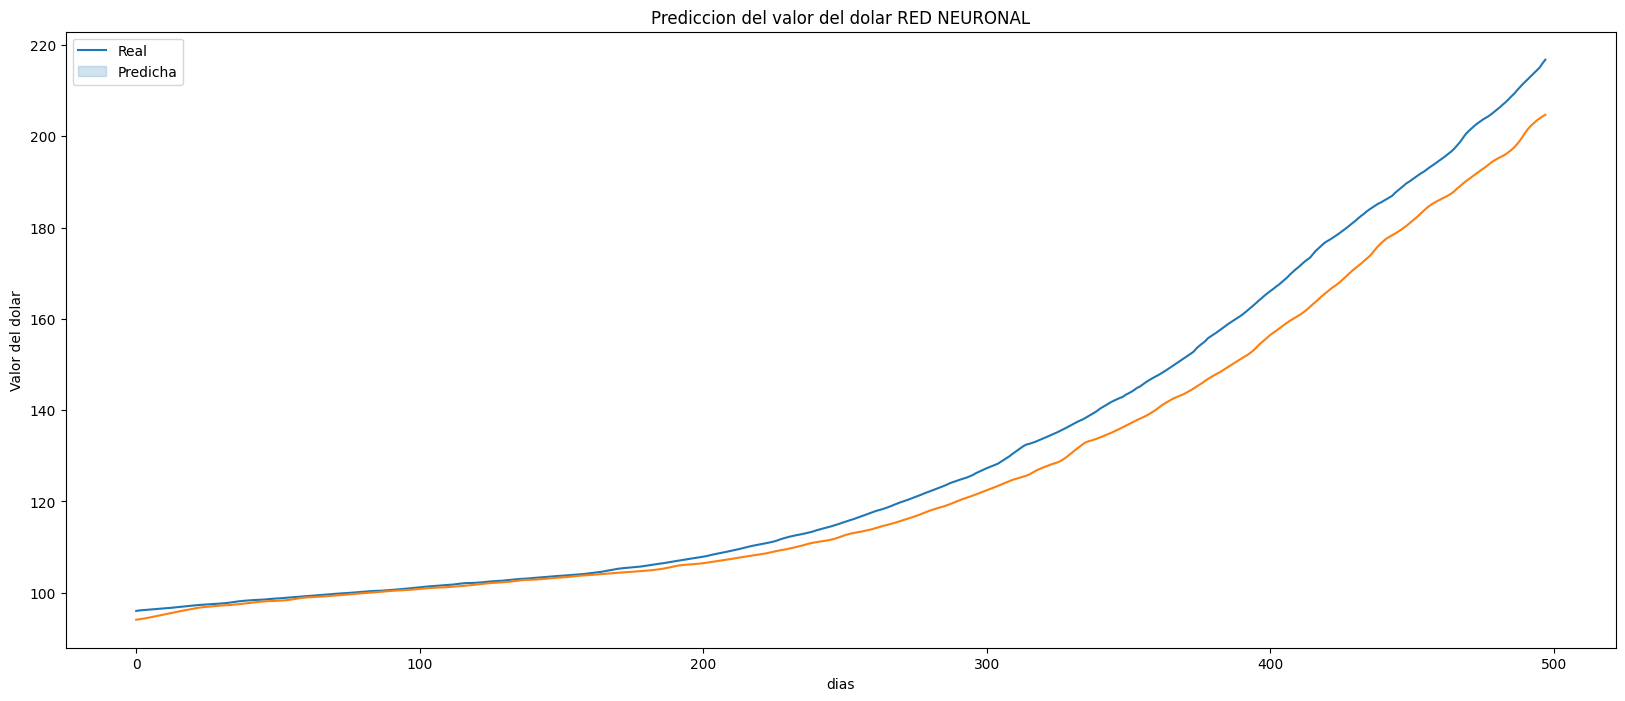

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=[i for i in range(0,X_test_2.shape[0])], y=y_test_2.iloc[:,0])
sns.lineplot(x=[i for i in range(X_test_2.shape[0])],y=predictions2[:,0])
#sns.lineplot(x=[i for i in range(len(dolar_mas_suavizado))], y = dolar_mas_suavizado['mas_suavizado'])

plt.title("Prediccion del valor del dolar RED NEURONAL")
plt.xlabel("dias")
plt.ylabel("Valor del dolar")
plt.legend(["Real","Predicha"])
plt.show()

##Prediccion con RED NEURONAL TESTEO 3

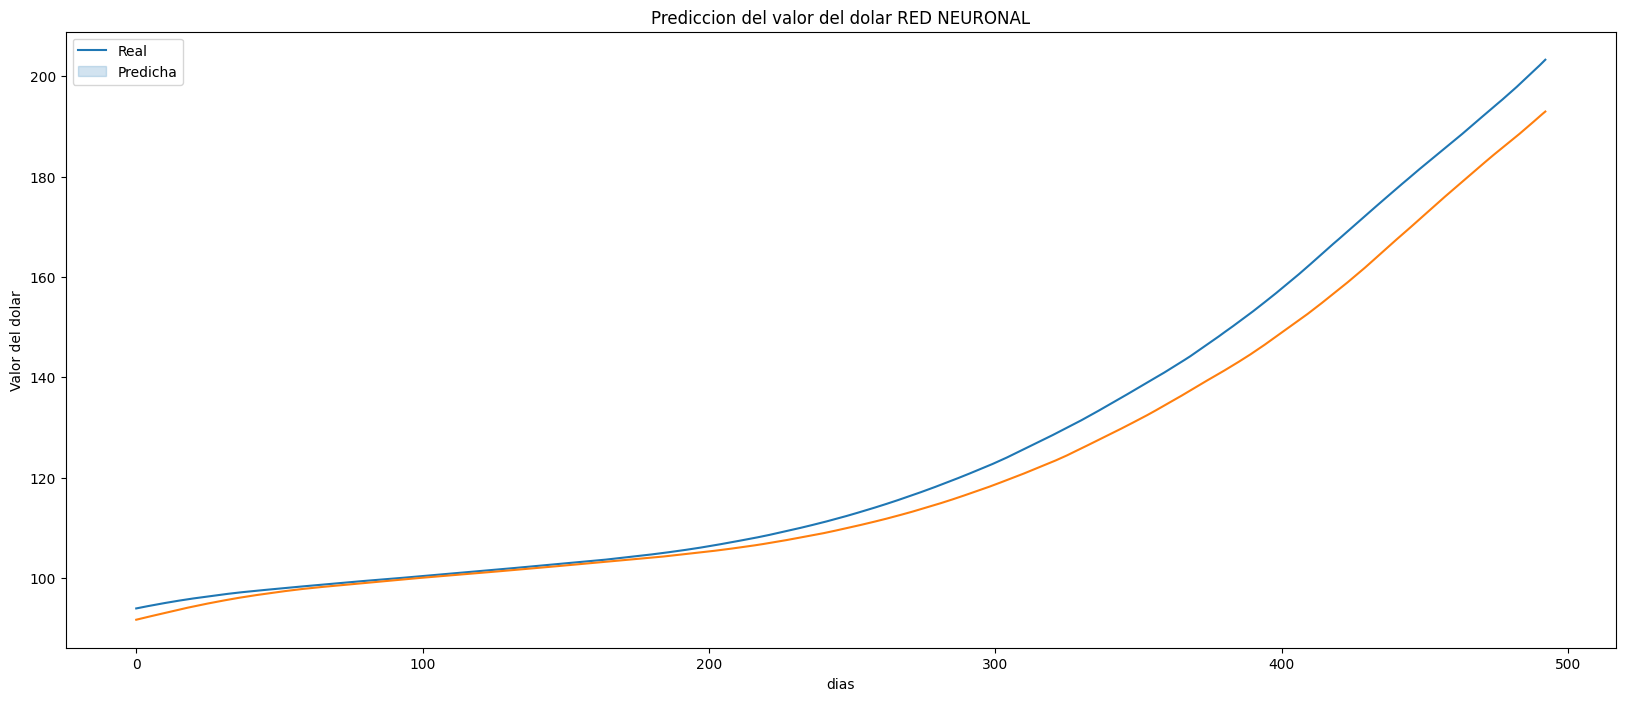

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=[i for i in range(0,X_test_2_mas.shape[0])], y=y_test_2_mas.iloc[:,0])
sns.lineplot(x=[i for i in range(X_test_2_mas.shape[0])],y=predictions3[:,0])
#sns.lineplot(x=[i for i in range(len(dolar_mas_suavizado))], y = dolar_mas_suavizado['mas_suavizado'])

plt.title("Prediccion del valor del dolar RED NEURONAL")
plt.xlabel("dias")
plt.ylabel("Valor del dolar")
plt.legend(["Real","Predicha"])
plt.show()

#MODELO 2 RED NEURONAL

##Prediccion con RED NEURONAL TESTEO 1

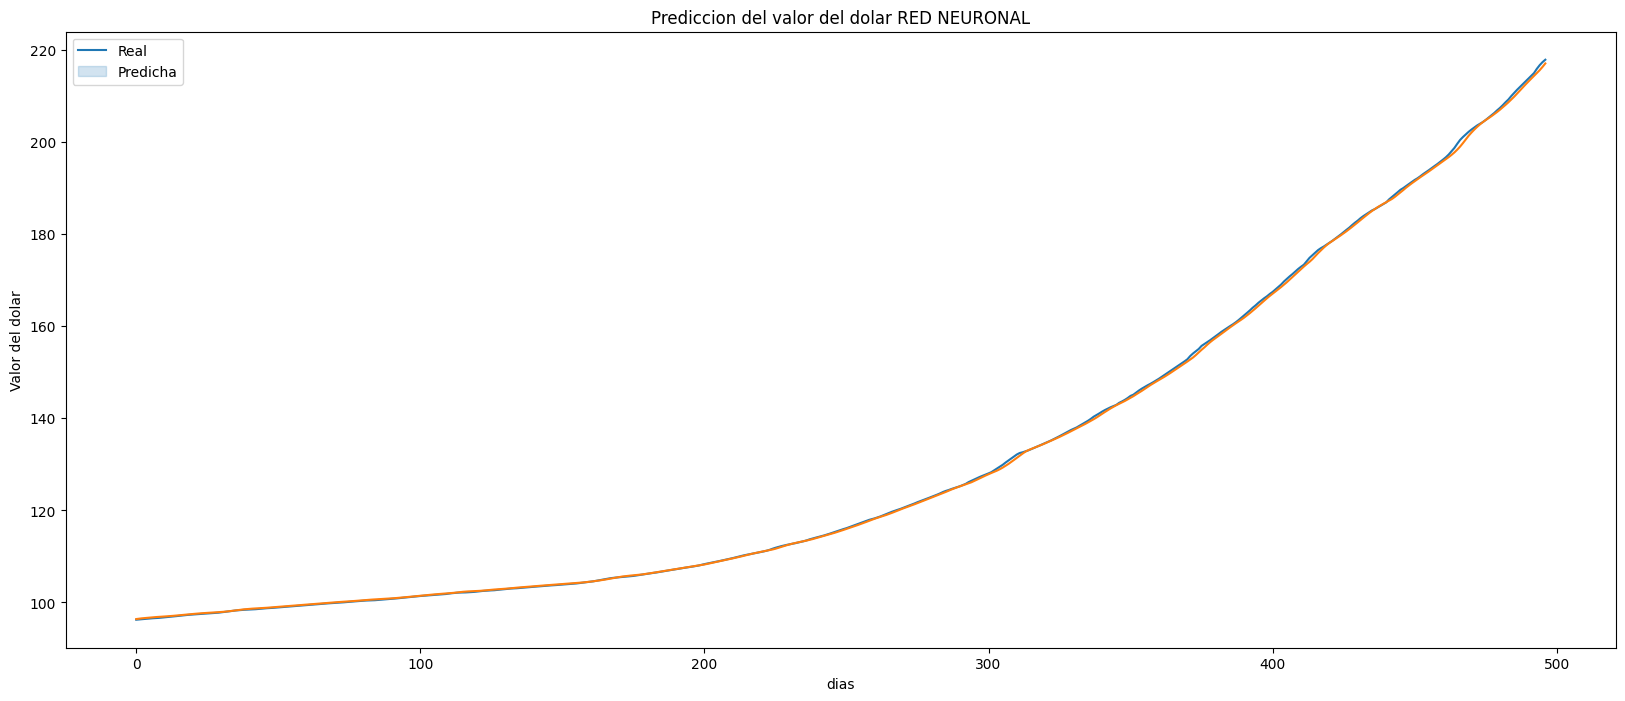

In [ ]:


plt.figure(figsize=(20,8))
sns.lineplot(x=[i for i in range(0,X_test.shape[0])], y=y_test.iloc[:,0])
sns.lineplot(x=[i for i in range(X_test.shape[0])],y=predictions_2[:,0])
#sns.lineplot(x=[i for i in range(len(dolar_mas_suavizado))], y = dolar_mas_suavizado['mas_suavizado'])

plt.title("Prediccion del valor del dolar RED NEURONAL")
plt.xlabel("dias")
plt.ylabel("Valor del dolar")
plt.legend(["Real","Predicha"])
plt.show()

##Prediccion con RED NEURONAL TESTEO 2

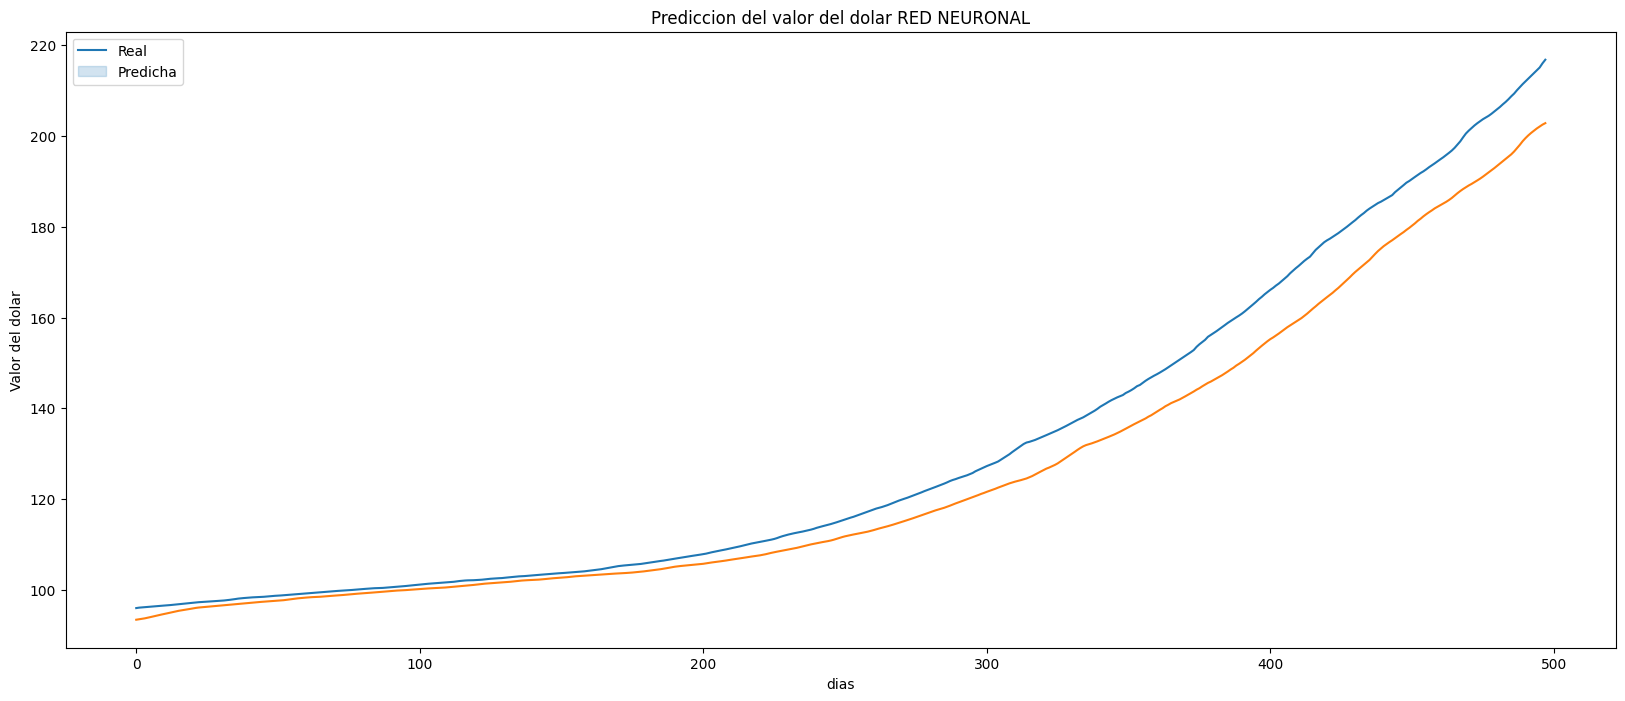

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=[i for i in range(0,X_test_2.shape[0])], y=y_test_2.iloc[:,0])
sns.lineplot(x=[i for i in range(X_test_2.shape[0])],y=predictions2_2[:,0])
#sns.lineplot(x=[i for i in range(len(dolar_mas_suavizado))], y = dolar_mas_suavizado['mas_suavizado'])

plt.title("Prediccion del valor del dolar RED NEURONAL")
plt.xlabel("dias")
plt.ylabel("Valor del dolar")
plt.legend(["Real","Predicha"])
plt.show()

##Prediccion con RED NEURONAL TESTEO 3

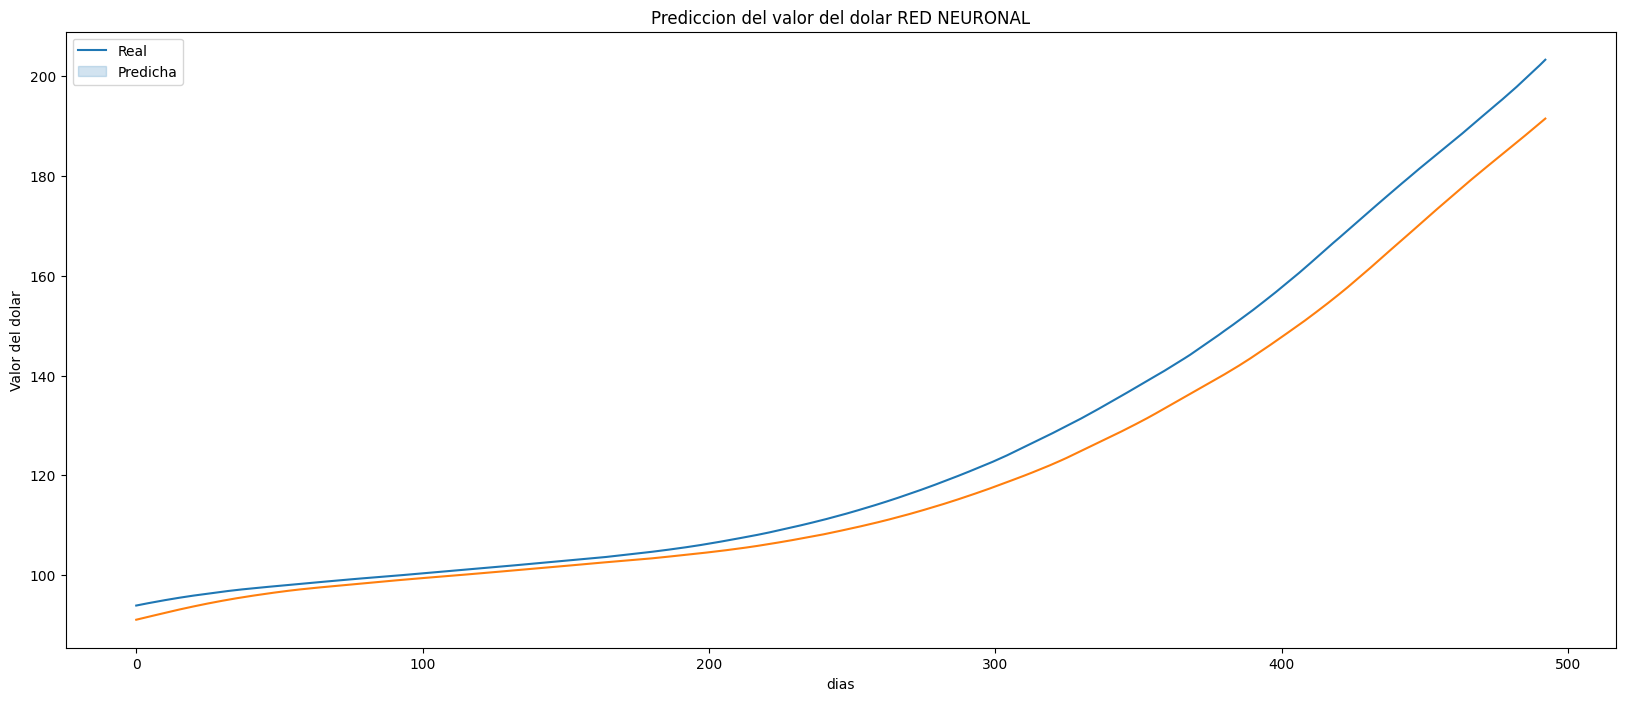

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=[i for i in range(0,X_test_2_mas.shape[0])], y=y_test_2_mas.iloc[:,0])
sns.lineplot(x=[i for i in range(X_test_2_mas.shape[0])],y=predictions3_2[:,0])
#sns.lineplot(x=[i for i in range(len(dolar_mas_suavizado))], y = dolar_mas_suavizado['mas_suavizado'])

plt.title("Prediccion del valor del dolar RED NEURONAL")
plt.xlabel("dias")
plt.ylabel("Valor del dolar")
plt.legend(["Real","Predicha"])
plt.show()

#**Conclusion** de comparacion entre redes neuronales

## Con el metedo evaluate se puede ver como **la red neuronal con menos neuronas tiene menos error**.

## Los resultados de ambos modelos no tienen tanta diferencia teniendo en cuenta la gran diferencia de cantidad de neuronas, por lo tanto, **dependiendo del problema tal vez no hace falta una gran cantidad de neuronas**.

## **Graficamente** comparando los valores reales con los valores de testeo, **no se nota una gran diferencia**.

## En el primer testeo use datos preprocesados y en el segundo y tercero use 2 set de datos sin ese preprocesamiento.

## El preprocesamiento cumple la funcion de que todos los valores de entrada tengan una importancia equilibrada para el modelo.

## Se nota que **en el primer testeo la prediccion en ambos modelos es mucho mas precisa** que en los testeos con los datos sin preprocesar.

## Esto ocurre porque no se uso una red neuronal recurrente y se toman todos los valores de entrada con la misma importancia.

#Regresion lineal multiple:

##Busqueda de mejores hiperparametros SGD Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,get_scorer_names,mean_absolute_percentage_error
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split


Scaler = RobustScaler()
scaled_X_train = Scaler.fit_transform(X_train.values.reshape(-1,22))
scaled_X_test = Scaler.transform(X_test.values.reshape(-1,22))

SGD_model = SGDRegressor(loss='squared_error',random_state=7,shuffle=False, early_stopping=True)
params = {
    "power_t" : [0.5, 0.25, 0.15, 0.1, 0.01, 0.35],
    "alpha": [0.01, 0.001, 0.0001, 0.00001],
    "eta0": [0.01, 0.001, 0.0001, 0.00001],
    "max_iter": [1000,10_000, 100_000]
}
GS = GridSearchCV(estimator = SGD_model,
                  param_grid = params,
                  scoring = mean_absolute_error,
                  refit = True,
                  cv = 2,
                  verbose = 2
)

Anteriormente busque mejores hiperparametros para el learning rate, tol, y max_iter, pero el resultado demostro que lo mejor es dejarlos por defecto y que la mejor configuracion es:


*   Alpha: 1e-05
*   eta0: 0.001
*   power_t: 0.1

Lo siguiente es el entrenamiento buscando los mejores hiperparametros



In [ ]:
#get_scorer_names()
GS.fit(X_train, y_train.iloc[:,0])

Fitting 2 folds for each of 288 candidates, totalling 576 fits
[CV] END ..alpha=0.01, eta0=0.01, max_iter=1000, power_t=0.5; total time=   0.0s
[CV] END ..alpha=0.01, eta0=0.01, max_iter=1000, power_t=0.5; total time=   0.0s
[CV] END .alpha=0.01, eta0=0.01, max_iter=1000, power_t=0.25; total time=   0.0s
[CV] END .alpha=0.01, eta0=0.01, max_iter=1000, power_t=0.25; total time=   0.0s
[CV] END .alpha=0.01, eta0=0.01, max_iter=1000, power_t=0.15; total time=   0.0s
[CV] END .alpha=0.01, eta0=0.01, max_iter=1000, power_t=0.15; total time=   0.0s
[CV] END ..alpha=0.01, eta0=0.01, max_iter=1000, power_t=0.1; total time=   0.0s
[CV] END ..alpha=0.01, eta0=0.01, max_iter=1000, power_t=0.1; total time=   0.0s
[CV] END .alpha=0.01, eta0=0.01, max_iter=1000, power_t=0.01; total time=   0.0s
[CV] END .alpha=0.01, eta0=0.01, max_iter=1000, power_t=0.01; total time=   0.0s
[CV] END .alpha=0.01, eta0=0.01, max_iter=1000, power_t=0.35; total time=   0.2s
[CV] END .alpha=0.01, eta0=0.01, max_iter=1000

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END alpha=0.001, eta0=0.01, max_iter=1000, power_t=0.35; total time=   0.7s
[CV] END alpha=0.001, eta0=0.01, max_iter=1000, power_t=0.35; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=10000, power_t=0.5; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=10000, power_t=0.5; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=10000, power_t=0.25; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=10000, power_t=0.25; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=10000, power_t=0.15; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=10000, power_t=0.15; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=10000, power_t=0.1; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=10000, power_t=0.1; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=10000, power_t=0.01; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=10000, power_t=0.01; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END alpha=0.001, eta0=0.01, max_iter=10000, power_t=0.35; total time=   9.7s
[CV] END alpha=0.001, eta0=0.01, max_iter=10000, power_t=0.35; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=100000, power_t=0.5; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=100000, power_t=0.5; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=100000, power_t=0.25; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=100000, power_t=0.25; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=100000, power_t=0.15; total time=   0.1s
[CV] END alpha=0.001, eta0=0.01, max_iter=100000, power_t=0.15; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=100000, power_t=0.1; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=100000, power_t=0.1; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=100000, power_t=0.01; total time=   0.0s
[CV] END alpha=0.001, eta0=0.01, max_iter=100000, power_t=0.01; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END alpha=0.001, eta0=0.01, max_iter=100000, power_t=0.35; total time= 1.1min
[CV] END alpha=0.001, eta0=0.01, max_iter=100000, power_t=0.35; total time=   0.0s
[CV] END alpha=0.001, eta0=0.001, max_iter=1000, power_t=0.5; total time=   0.0s
[CV] END alpha=0.001, eta0=0.001, max_iter=1000, power_t=0.5; total time=   0.0s
[CV] END alpha=0.001, eta0=0.001, max_iter=1000, power_t=0.25; total time=   0.0s
[CV] END alpha=0.001, eta0=0.001, max_iter=1000, power_t=0.25; total time=   0.0s
[CV] END alpha=0.001, eta0=0.001, max_iter=1000, power_t=0.15; total time=   0.0s
[CV] END alpha=0.001, eta0=0.001, max_iter=1000, power_t=0.15; total time=   0.0s
[CV] END alpha=0.001, eta0=0.001, max_iter=1000, power_t=0.1; total time=   0.0s
[CV] END alpha=0.001, eta0=0.001, max_iter=1000, power_t=0.1; total time=   0.0s
[CV] END alpha=0.001, eta0=0.001, max_iter=1000, power_t=0.01; total time=   0.0s
[CV] END alpha=0.001, eta0=0.001, max_iter=1000, power_t=0.01; total time=   0.0s
[CV] END alpha=0.0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END alpha=0.0001, eta0=0.01, max_iter=1000, power_t=0.35; total time=   0.7s
[CV] END alpha=0.0001, eta0=0.01, max_iter=1000, power_t=0.35; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=10000, power_t=0.5; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=10000, power_t=0.5; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=10000, power_t=0.25; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=10000, power_t=0.25; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=10000, power_t=0.15; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=10000, power_t=0.15; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=10000, power_t=0.1; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=10000, power_t=0.1; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=10000, power_t=0.01; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=10000, power_t=0.01; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END alpha=0.0001, eta0=0.01, max_iter=10000, power_t=0.35; total time=   7.3s
[CV] END alpha=0.0001, eta0=0.01, max_iter=10000, power_t=0.35; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=100000, power_t=0.5; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=100000, power_t=0.5; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=100000, power_t=0.25; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=100000, power_t=0.25; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=100000, power_t=0.15; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=100000, power_t=0.15; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=100000, power_t=0.1; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=100000, power_t=0.1; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=100000, power_t=0.01; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, max_iter=100000, power_t=0.01; total time=   0.0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END alpha=0.0001, eta0=0.01, max_iter=100000, power_t=0.35; total time= 1.1min
[CV] END alpha=0.0001, eta0=0.01, max_iter=100000, power_t=0.35; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.001, max_iter=1000, power_t=0.5; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.001, max_iter=1000, power_t=0.5; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.001, max_iter=1000, power_t=0.25; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.001, max_iter=1000, power_t=0.25; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.001, max_iter=1000, power_t=0.15; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.001, max_iter=1000, power_t=0.15; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.001, max_iter=1000, power_t=0.1; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.001, max_iter=1000, power_t=0.1; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.001, max_iter=1000, power_t=0.01; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.001, max_iter=1000, power_t=0.01; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END alpha=1e-05, eta0=0.01, max_iter=1000, power_t=0.35; total time=   1.2s
[CV] END alpha=1e-05, eta0=0.01, max_iter=1000, power_t=0.35; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.01, max_iter=10000, power_t=0.5; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.01, max_iter=10000, power_t=0.5; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.01, max_iter=10000, power_t=0.25; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.01, max_iter=10000, power_t=0.25; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.01, max_iter=10000, power_t=0.15; total time=   0.1s
[CV] END alpha=1e-05, eta0=0.01, max_iter=10000, power_t=0.15; total time=   0.1s
[CV] END alpha=1e-05, eta0=0.01, max_iter=10000, power_t=0.1; total time=   0.1s
[CV] END alpha=1e-05, eta0=0.01, max_iter=10000, power_t=0.1; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.01, max_iter=10000, power_t=0.01; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.01, max_iter=10000, power_t=0.01; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END alpha=1e-05, eta0=0.01, max_iter=10000, power_t=0.35; total time=  14.6s
[CV] END alpha=1e-05, eta0=0.01, max_iter=10000, power_t=0.35; total time=   0.1s
[CV] END alpha=1e-05, eta0=0.01, max_iter=100000, power_t=0.5; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.01, max_iter=100000, power_t=0.5; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.01, max_iter=100000, power_t=0.25; total time=   0.1s
[CV] END alpha=1e-05, eta0=0.01, max_iter=100000, power_t=0.25; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.01, max_iter=100000, power_t=0.15; total time=   0.1s
[CV] END alpha=1e-05, eta0=0.01, max_iter=100000, power_t=0.15; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.01, max_iter=100000, power_t=0.1; total time=   0.1s
[CV] END alpha=1e-05, eta0=0.01, max_iter=100000, power_t=0.1; total time=   0.1s
[CV] END alpha=1e-05, eta0=0.01, max_iter=100000, power_t=0.01; total time=   0.1s
[CV] END alpha=1e-05, eta0=0.01, max_iter=100000, power_t=0.01; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END alpha=1e-05, eta0=0.01, max_iter=100000, power_t=0.35; total time= 1.2min
[CV] END alpha=1e-05, eta0=0.01, max_iter=100000, power_t=0.35; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.001, max_iter=1000, power_t=0.5; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.001, max_iter=1000, power_t=0.5; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.001, max_iter=1000, power_t=0.25; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.001, max_iter=1000, power_t=0.25; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.001, max_iter=1000, power_t=0.15; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.001, max_iter=1000, power_t=0.15; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.001, max_iter=1000, power_t=0.1; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.001, max_iter=1000, power_t=0.1; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.001, max_iter=1000, power_t=0.01; total time=   0.0s
[CV] END alpha=1e-05, eta0=0.001, max_iter=1000, power_t=0.01; total time=   0.0s
[CV] END alpha=1e-

GridSearchCV(cv=2,
             estimator=SGDRegressor(early_stopping=True, random_state=7,
                                    shuffle=False),
             param_grid={'alpha': [0.01, 0.001, 0.0001, 1e-05],
                         'eta0': [0.01, 0.001, 0.0001, 1e-05],
                         'max_iter': [1000, 10000, 100000],
                         'power_t': [0.5, 0.25, 0.15, 0.1, 0.01, 0.35]},
             verbose=2)

In [ ]:
GS.best_score_

0.8905583249450334

Paso a excel los resultados:

In [ ]:
resultadosGS = pd.DataFrame(GS.cv_results_)
resultadosGS = resultadosGS.sort_values("rank_test_score")
resultadosGS.to_csv("cv_resultados.csv")

mejores parametros:
Segun lo visto en el excel los mejores parametros son:
`{'alpha': 1e-05,
 'eta0': 0.001,
  'learning_rate': 'invscaling',
   'max_iter': 1000,
    'power_t': 0.1,
     'tol': 0.001}`

In [ ]:
print(GS.best_params_)
bestSGD = GS.best_estimator_
bestSGD

{'alpha': 0.01, 'eta0': 0.001, 'max_iter': 1000, 'power_t': 0.15}


SGDRegressor(alpha=0.01, early_stopping=True, eta0=0.001, power_t=0.15,
             random_state=7, shuffle=False)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
y_pred = bestSGD.predict(X_test)

mae_pts = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'mae : {mae_pts}')
print(f'mse : {mse}')
print(f'mape : {mape}')


mae : 3.78230726539363
mse : 19.795667290763223
mape : 0.026435385826835717


##Regresion lineal multiple:

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split


Scaler = RobustScaler()
scaled_X_train = Scaler.fit_transform(X_train.values.reshape(-1,22))
scaled_X_test = Scaler.transform(X_test.values.reshape(-1,22))


#SGD_model = SGDRegressor(alpha=1e-05, eta0=0.001, power_t=0.1, random_state=7,verbose=2,shuffle=False)
SGD_model = SGDRegressor(alpha=0.01, early_stopping=False, eta0=0.001, power_t=0.15, random_state=7, shuffle=False)

SGD_model.fit(X_train, y_train.iloc[:,0])
y_pred = SGD_model.predict(X_test)
mae_pts = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'RESULTADOS CON DATOS SIN ESCALAR:')
print(f'mae: {mae_pts}')
print(f'mse: {mse}')
print(f'mape: {mape}')

SGD_model.fit(scaled_X_train, y_train.iloc[:,0])
y_pred_scaled = SGD_model.predict(scaled_X_test)
mae_pts = mean_absolute_error(y_test, y_pred_scaled)
mse = mean_squared_error(y_test, y_pred_scaled)
mape = mean_absolute_percentage_error(y_test, y_pred_scaled)
print(f'\nRESULTADOS CON DATOS ESCALADOS:')
print(f'mae: {mae_pts}')
print(f'mse: {mse}')
print(f'mape: {mape}')



RESULTADOS CON DATOS SIN ESCALAR:
mae: 3.781900236815578
mse: 19.909318266542932
mape: 0.026387945410717425

RESULTADOS CON DATOS ESCALADOS:
mae: 1.138791120300945
mse: 1.5928324717184672
mape: 0.009518389629873024


##Grafico de prediccion con entrenamiento sin escalar

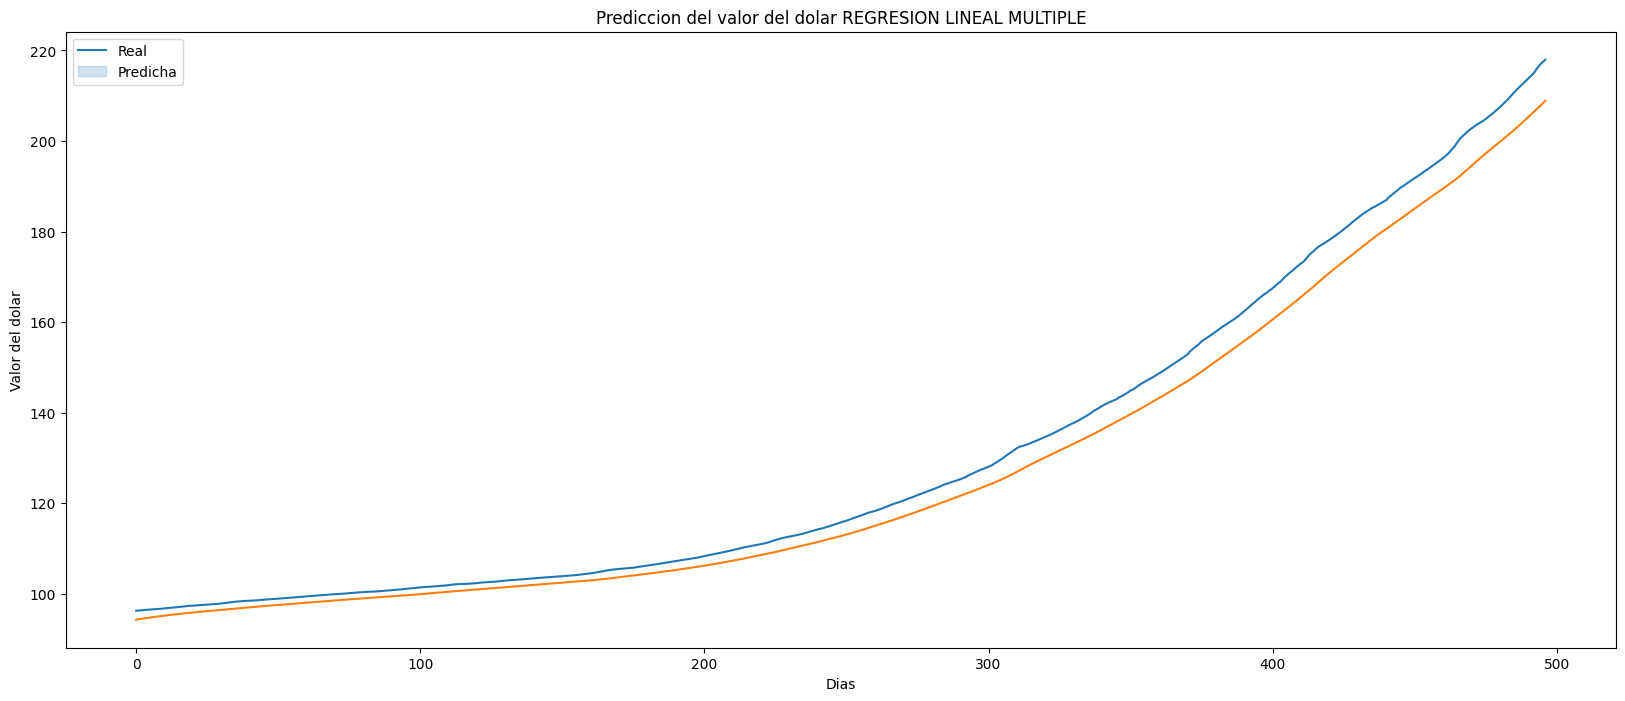

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
sns.lineplot(x=[i for i in range(0,X_test.shape[0])], y=y_test.iloc[:,0])
x_lista = [i for i in range(X_test.shape[0])]
sns.lineplot(x=x_lista,y=y_pred)
#sns.lineplot(x=[i for i in range(len(dolar_mas_suavizado))], y = dolar_mas_suavizado['mas_suavizado'])

plt.title("Prediccion del valor del dolar REGRESION LINEAL MULTIPLE")
plt.xlabel("Dias")
plt.ylabel("Valor del dolar")
plt.legend(["Real","Predicha"])
plt.show()

##Grafico de prediccion con entrenamiento con escalado

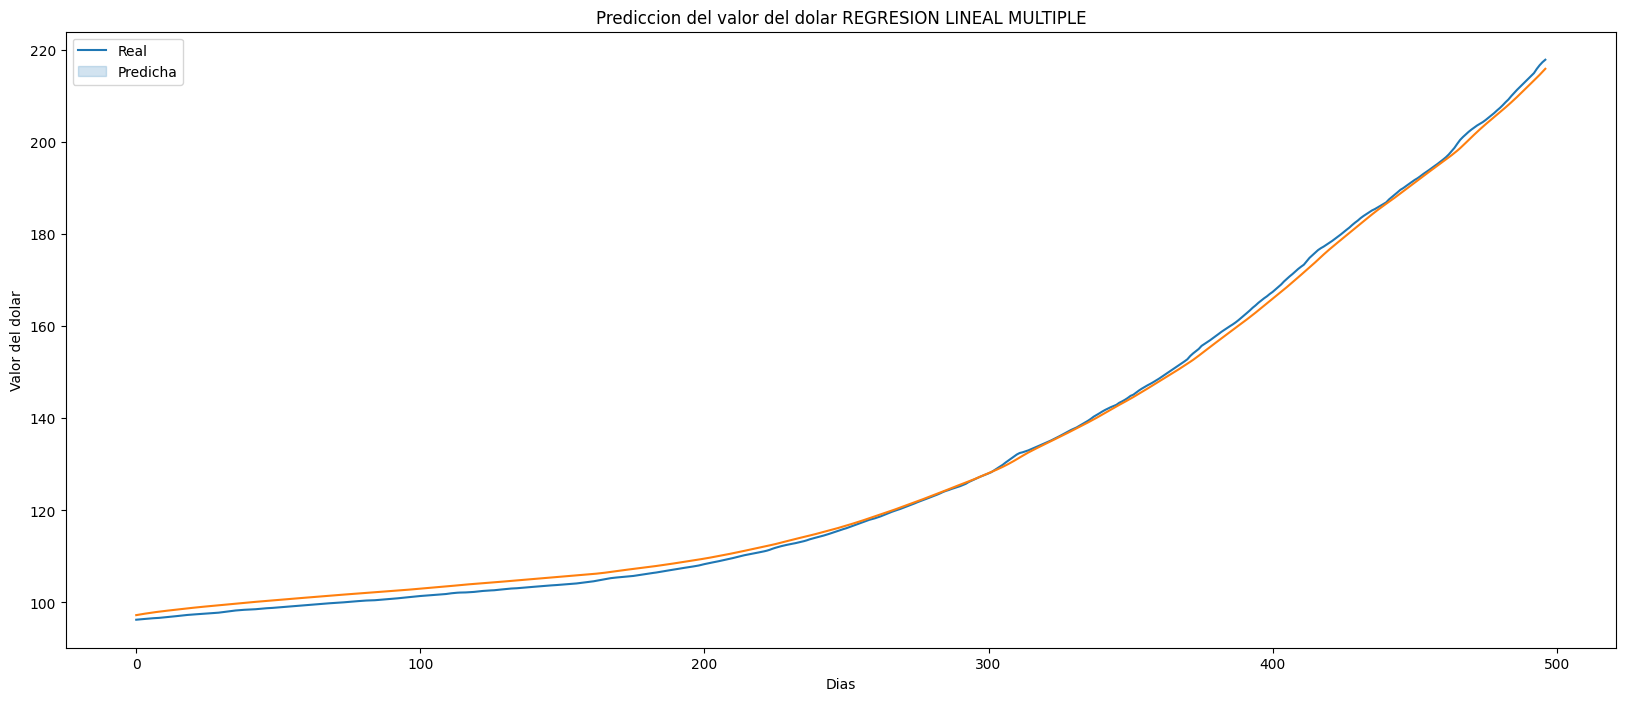

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
sns.lineplot(x=[i for i in range(0,scaled_X_test.shape[0])], y=y_test.iloc[:,0])
x_lista = [i for i in range(scaled_X_test.shape[0])]
sns.lineplot(x=x_lista,y=y_pred_scaled)


plt.title("Prediccion del valor del dolar REGRESION LINEAL MULTIPLE")
plt.xlabel("Dias")
plt.ylabel("Valor del dolar")
plt.legend(["Real","Predicha"])
plt.show()

##Mas pruebas sobre la efectividad del modelo con SGDRegressor

In [ ]:
#escalado de los otros 2 set de testeo
scaled_X_test_2 = Scaler.transform(X_test_2.values.reshape(-1,22))
scaled_X_test_2_mas = Scaler.transform(X_test_2_mas.values.reshape(-1,22))

In [ ]:
y_pred_scaled_2 = SGD_model.predict(scaled_X_test_2)

y_pred_scaled_3 = SGD_model.predict(scaled_X_test_2_mas)

##Grafico de prediccion TESTEO 2 con ventana 5

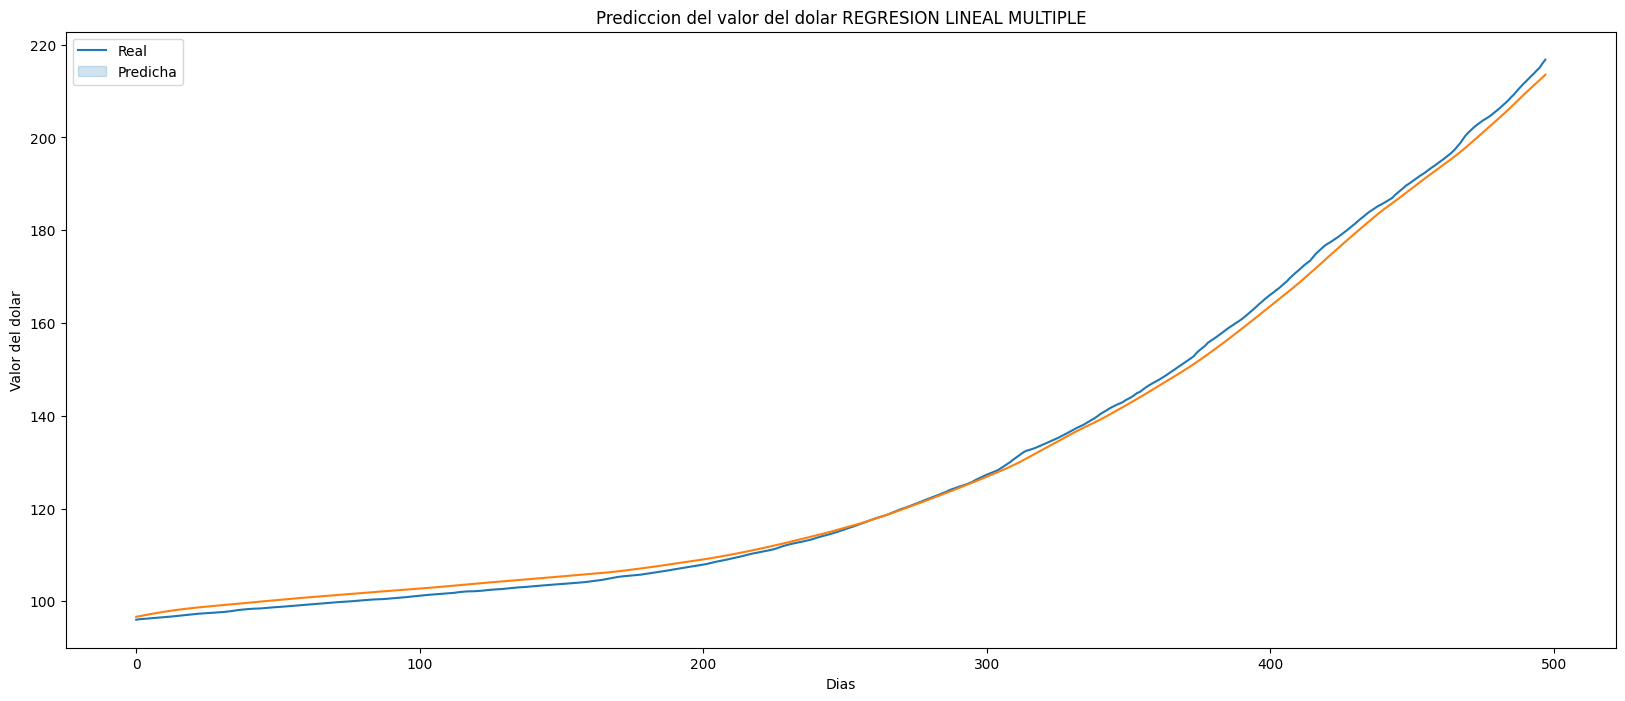

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=[i for i in range(0,scaled_X_test_2.shape[0])], y=y_test_2.iloc[:,0])
x_lista = [i for i in range(scaled_X_test_2.shape[0])]
sns.lineplot(x=x_lista,y=y_pred_scaled_2)


plt.title("Prediccion del valor del dolar REGRESION LINEAL MULTIPLE")
plt.xlabel("Dias")
plt.ylabel("Valor del dolar")
plt.legend(["Real","Predicha"])
plt.show()

##Grafico de prediccion TESTEO 3 con ventana 50

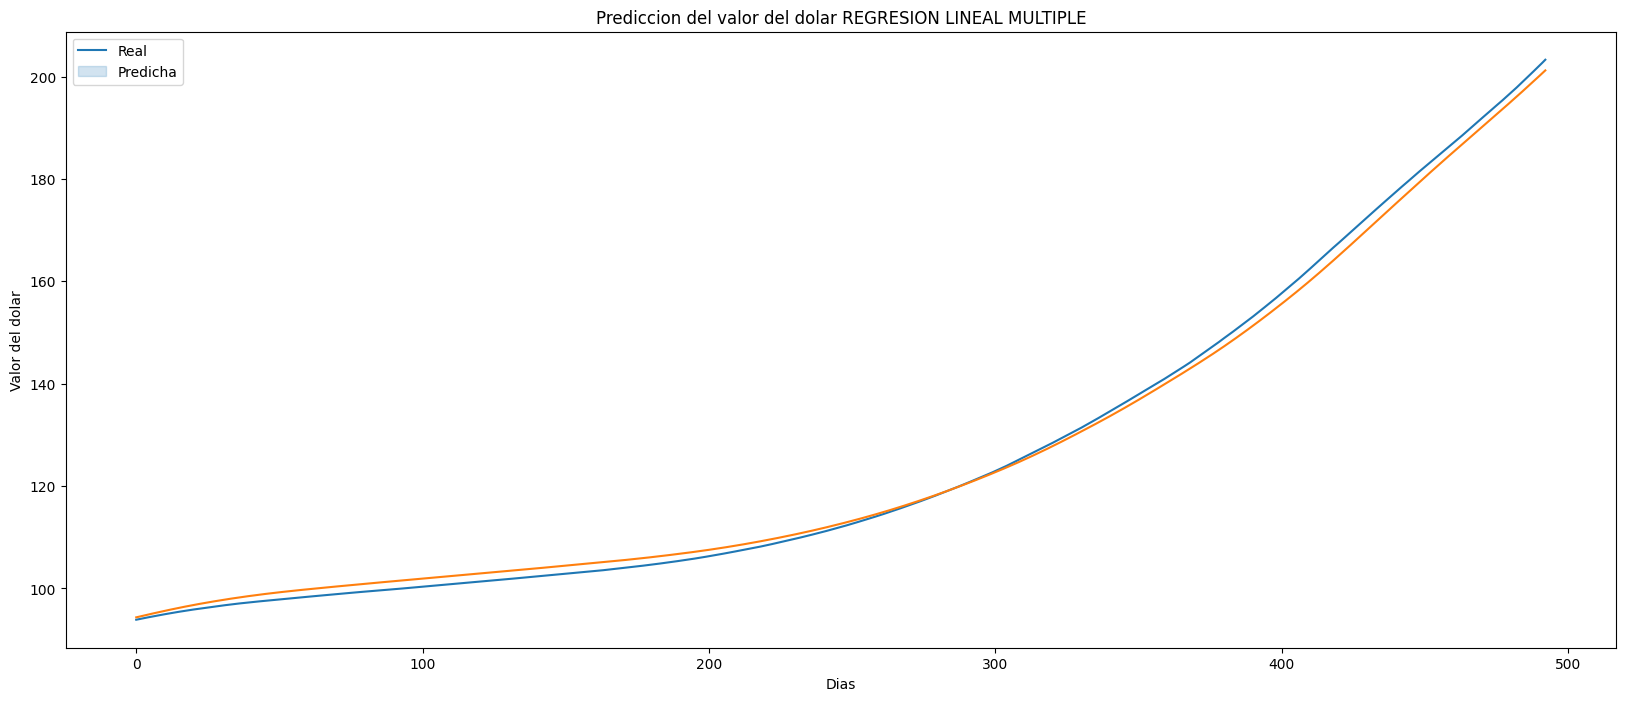

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=[i for i in range(0,scaled_X_test_2_mas.shape[0])], y=y_test_2_mas.iloc[:,0])
x_lista = [i for i in range(scaled_X_test_2_mas.shape[0])]
sns.lineplot(x=x_lista,y=y_pred_scaled_3)


plt.title("Prediccion del valor del dolar REGRESION LINEAL MULTIPLE")
plt.xlabel("Dias")
plt.ylabel("Valor del dolar")
plt.legend(["Real","Predicha"])
plt.show()

#Eleccion de metricas de evaluacion:
En este caso yo elegi mae, mse y mape, porque se busca predecir un valor.

El mse penaliza mas a los valores altos mientras que el mae no.

Tambien el mse puede llegar a dar un valor de error muy alto en set de datos con mucho ruido, es decir, subestimar el modelo y dar poco error a uno sin mucho ruido, es decir, sobreestimar el modelo.

El MAE se usa generalmente en finanzas, porque suele haber mas valores "atipicos".

#Conclusiones:
Es importante encontrar los mejores hiperparametros porque puede haber mucha diferencia si no los elegimos bien.

Creo que en este caso con una red neuronal con relativamente pocas neuronas se puede llegar a un modelo muy efectivo.

Con regresion lineal se puede llegar a un modelo bastante bueno pero la red neuronal sigue siendo la mejor opcion.

Tambien es importante el tratado de los datos a usar en el entrenamiento y en el testeo.

Tanto en las redes neuronales como en el modelo de regresion lineal multiple el tratado de los datos marca una diferencia en la efectividad de los modelos.